In [56]:
from selenium import webdriver
import time, os
import io
import requests
from bs4 import BeautifulSoup
from PIL import Image
import hashlib

from selenium.webdriver.chrome.options import Options
from selenium.webdriver import DesiredCapabilities

from pyvirtualdisplay import Display

In [144]:
# When migrating away from Jupyter notebook, this will proabbly be moved to a __main__
# options = Options()
# options.headless = True

# capabilities = DesiredCapabilities.CHROME.copy()
# capabilities['accetSslCerts'] = True
# capabilities['acceptInsecureCerts'] = True

display = Display(visible=0, size=(1024, 768))
display.start()

DRIVER_PATH = "./chromedriver"
wd = webdriver.Chrome(executable_path=DRIVER_PATH, options=options, desired_capabilities=capabilities)

In [145]:
search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
query = "hellfire"
wd.get(search_url.format(q=query))

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>hellfire - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.Sj5LKyeUKoE.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9ToCtoaz0mr9IKXAop6Eq9AIpSlw/cb=gapi.loaded_0" nonce="WEUv60xpBWk9OVIudk7Mpg==" async=""></script><script nonce="WEUv60xpBWk9OVIudk7Mpg==">(function(){window.google={kEI:'JkMqXpDnOsvbtAabyb6QCg',kEXPI:'0,1353746,5663,731,223,4726,379,206,1244,1171,540,249,10,1051,175,352,12,1118,36,3,209,69,4,60,688,54,599,47,325,1128715,143,1197731,293,125,28,329090,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,5298,2488,328,5033,10931,279,1191,14056,867,7049,2445,2646,793,845,3666,1027,10213,363,895,5475,341,11,2103,3961,1800,512,2111,4859,1361,4323,4968,447,2575,4745,3118,7915,1808,1976,2044,5766,1,1455,1687,5297,2054,9
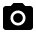
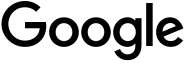
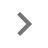
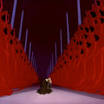
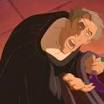
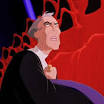
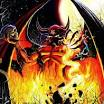
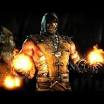
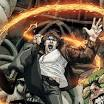
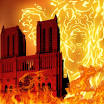
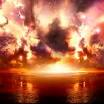
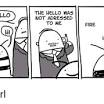
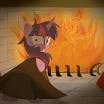
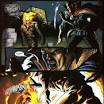
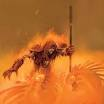
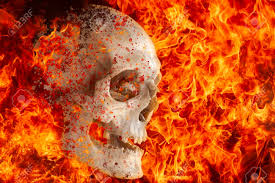
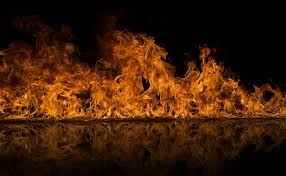
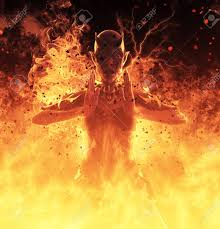
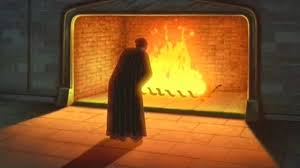
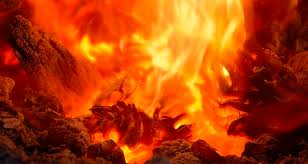
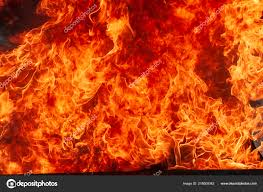
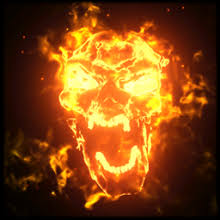
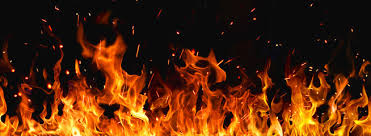
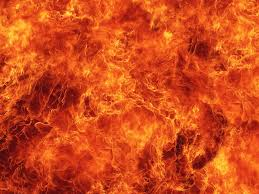
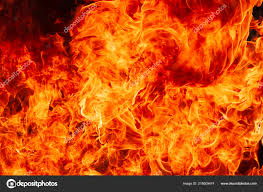
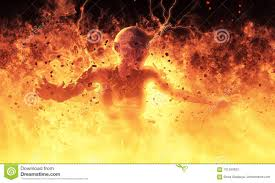
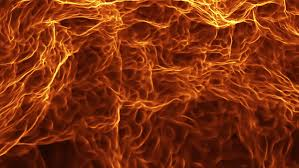
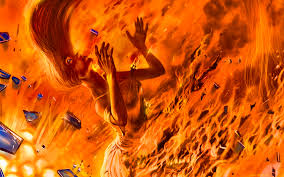
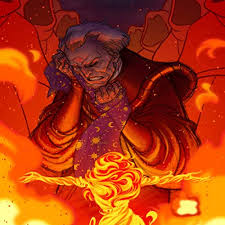
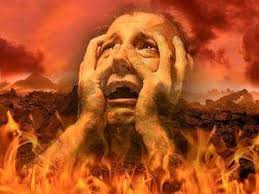
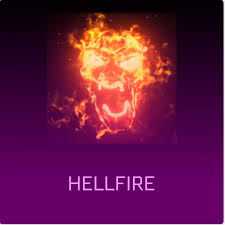
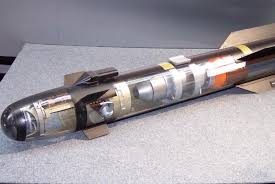
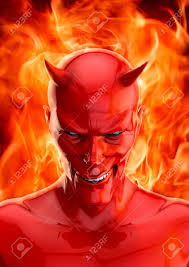
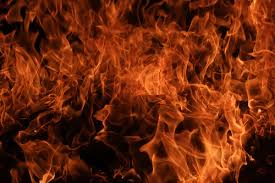
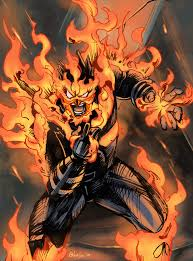
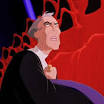
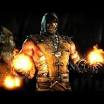
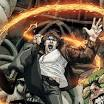
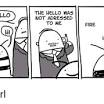
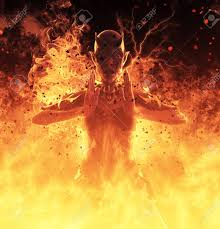
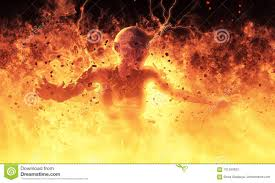
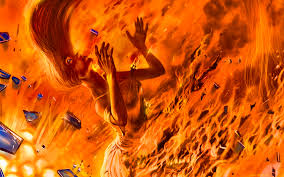
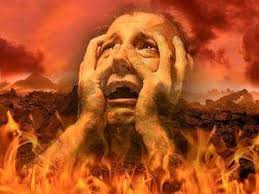
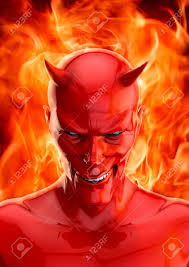
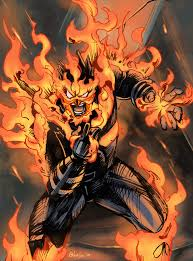

In [146]:
print(wd.page_source)
sourcelen1 = len(wd.page_source)

In [147]:
actual_images = wd.find_elements_by_css_selector("img.irc_mi")
print(len(actual_images))

0


In [155]:
wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)
sourcelen2 = len(wd.page_source)

In [133]:
print(sourcelen1)
print(sourcelen2)

1290005
1549644


In [134]:
wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)
sourcelen3 = len(wd.page_source)
print(sourcelen3)

1818850


In [148]:
thumbnail_results = wd.find_elements_by_css_selector("img.rg_ic")
number_results = len(thumbnail_results)
print(number_results)

100


In [149]:
print(thumbnail_results[0])

<selenium.webdriver.remote.webelement.WebElement (session="23ff6fafe505a07ab5db6ebdc33b61ac", element="da948d4d-bf92-432b-9fca-8cd30a230623")>


In [150]:
image = thumbnail_results[0]
??image

In [151]:
image.click()

In [106]:
??image

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>hellfire - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.Sj5LKyeUKoE.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9ToCtoaz0mr9IKXAop6Eq9AIpSlw/cb=gapi.loaded_0" nonce="WEUv60xpBWk9OVIudk7Mpg==" async=""></script><script nonce="WEUv60xpBWk9OVIudk7Mpg==">(function(){window.google={kEI:'JkMqXpDnOsvbtAabyb6QCg',kEXPI:'0,1353746,5663,731,223,4726,379,206,1244,1171,540,249,10,1051,175,352,12,1118,36,3,209,69,4,60,688,54,599,47,325,1128715,143,1197731,293,125,28,329090,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,5298,2488,328,5033,10931,279,1191,14056,867,7049,2445,2646,793,845,3666,1027,10213,363,895,5475,341,11,2103,3961,1800,512,2111,4859,1361,4323,4968,447,2575,4745,3118,7915,1808,1976,2044,5766,1,1455,1687,5297,2054,9
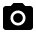
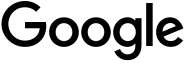
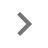
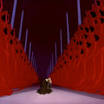
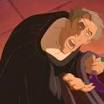
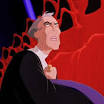
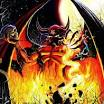
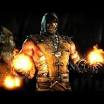
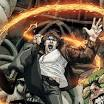
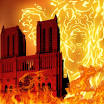
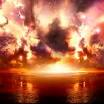
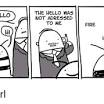
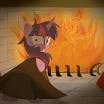
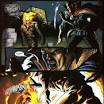
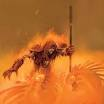
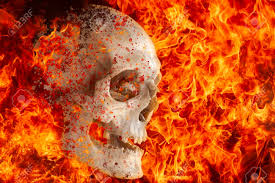
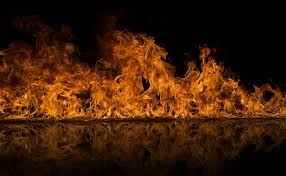
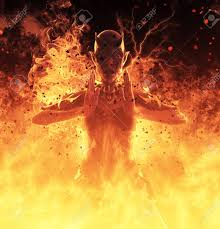
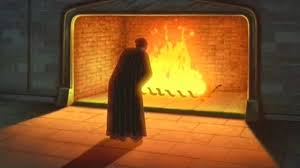
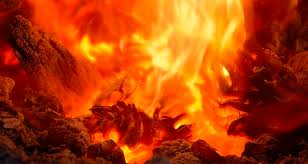
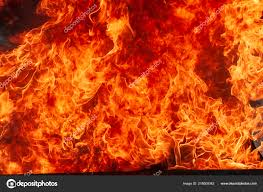
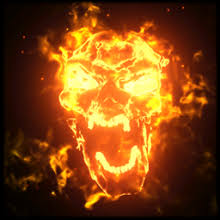
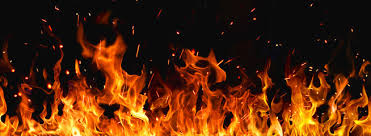
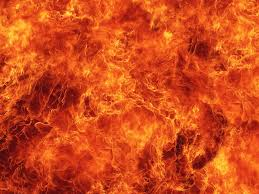
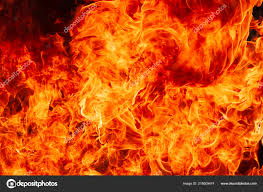
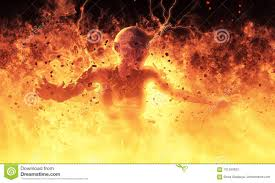
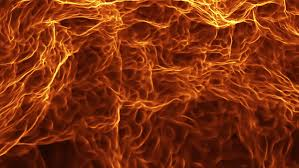
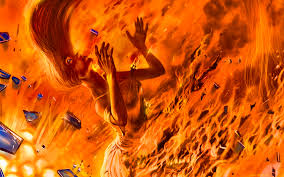
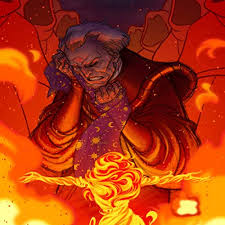
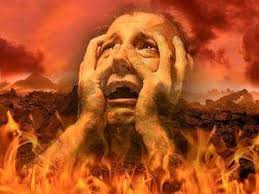
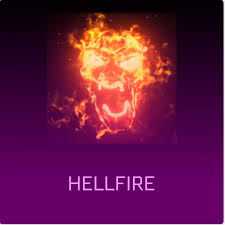
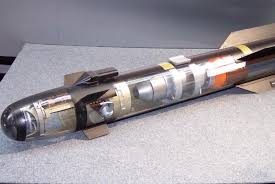
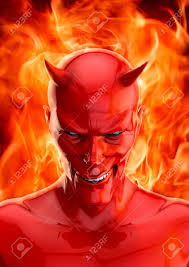
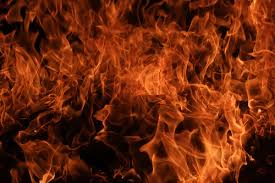
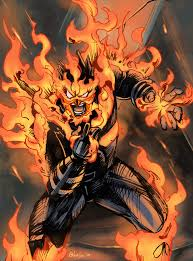
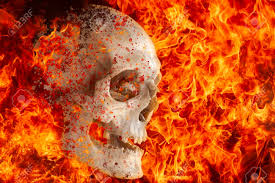
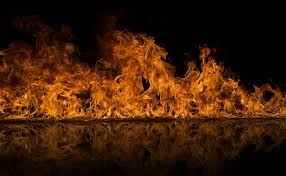
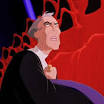
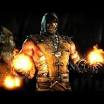
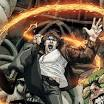
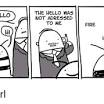
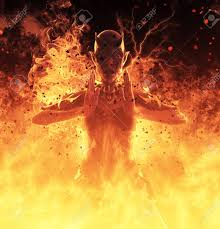
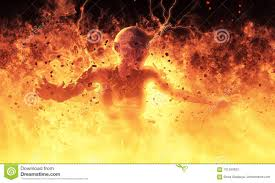
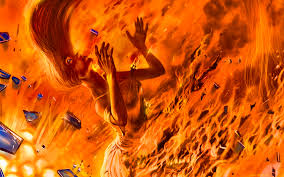
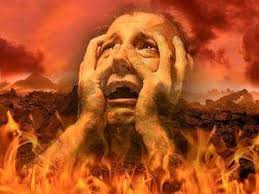
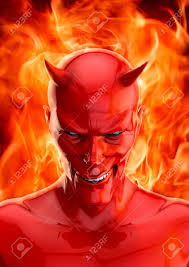
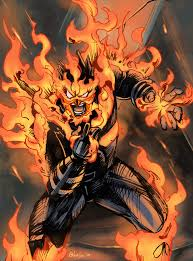

In [152]:
print(wd.page_source)
sourcelen2 = len(wd.page_source)
print(sourcelen1)
print(sourcelen2)

In [156]:
actual_images = wd.find_elements_by_css_selector('img.irc_mi')
print(len(actual_images))

0


In [157]:
thumbnail_urls = set()
for result in thumbnail_results:
    if result.get_attribute('src'):
        thumbnail_urls.add(result.get_attribute('src'))
print(len(thumbnail_urls))

26


In [158]:
image_urls = set()
for actual_image in actual_images:
    if actual_image.get_attribute('src'):
        image_urls.add(actual_image.get_attribute('src'))
print(image_urls)
print(actual_images)
print(actual_images[0].get_attribute('src'))

set()
[]


IndexError: list index out of range

In [143]:
wd.quit()
display.stop()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1044'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1044'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

In [17]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)
        
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
    
    wd.get(search_url.format(q=query))
    
    image_urls = set()
    image_count = 0
    results_start = 0
    
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)
        
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_ic")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue
                
            actual_images = wd.find_elements_by_css_selector('img.irc_mi')
            for actual_image in actual_images:
                if actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))
                    
            image_count = len(image_urls)
            
            if image_count >= max_links_to_fetch:
                print(f"Found: {image_count} image links, done!")
                break
        else:
            print("Found:", image_count, "image links, looking for more...")
            time.sleep(1)
            load_more_button = wd.find_element_by_css_selector(".ksb")
            if load_more_button:
                wd.execute_script("document.querySelector('.ksb').click();")

        results_start = len(thumbnail_results)
    return image_urls

In [19]:
fetch_image_urls("ferret", 5, wd)

Found: 200 search results. Extracting links from 0:200
Found: 5 image links, done!


{'https://media.daysoftheyear.com/20171223130951/ferret-day-1920x580.jpg',
 'https://petco.scene7.com/is/image/PETCO/153044-right-4?$ProductDetail-large$',
 'https://s7d1.scene7.com/is/image/PETCO/153044-left-1?$ProductDetail-large$',
 'https://upload.wikimedia.org/wikipedia/commons/3/32/Ferret_2008.png',
 'https://www.cdc.gov/healthypets/images/pets/ferret-on-white-background.jpg'}

In [8]:
wd.quit()

In [5]:
def persist_image(folder_path:str, url:str):
    try:
        image_content = requests.get(url).content
    except Exception as e:
        print(f"ERROR - could not download {url} - {e}")
        
    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path, hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [6]:
def search_and_download(search_term:str, driver_path:str, target_path='./images', number_images=5, headless=False):
    target_folder = os.path.join(target_path, '_'.join(search_term.lower().split(' ')))
    
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    
    options = Options()
    options.headless = headless
    with webdriver.Chrome(executable_path=driver_path, options=options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
#         persist_image(target_folder, elem)
        pass

In [20]:
search_term = "ship"
DRIVER_PATH = "./chromedriver"

search_and_download(search_term=search_term, driver_path=DRIVER_PATH)

Found: 200 search results. Extracting links from 0:200
Found: 5 image links, done!


In [21]:
search_and_download(search_term=search_term, driver_path=DRIVER_PATH, headless=True)

Found: 200 search results. Extracting links from 0:200


ConnectionResetError: [Errno 104] Connection reset by peer